In [17]:
import numpy as np
from newton_method import newton_method
from simpson_method import simpson_method
from bisection_method import bisection_method

import matplotlib.pyplot as plt

### 1. Решение ситемы нелинейных уравнений.

$$
\left\{
\begin{flalign*}
    &x^2 + y^2 + z^2 = 1 & \\
    &2x^2 + y^2 - 4z = 0 & \\
    &3x^2 - 4y + z^2 = 0 &
\end{flalign*}
\right.
$$

In [18]:
def F(x: np.ndarray) -> np.ndarray:
    return np.array([x[0] ** 2 + x[1] ** 2 + x[2] ** 2 - 1,
                     2 * x[0] ** 2 + x[1] ** 2 - 4 * x[2],
                     3 * x[0] ** 2 - 4 * x[1] ** 2 + x[2]])


def Jacobian(x: np.ndarray) -> np.ndarray:
    return np.array([[2 * x[0], 2 * x[1], 2 * x[2]],
                     [4 * x[0], 2 * x[1], -4],
                     [6 * x[0], -4, 2 * x[2]]])


zero_approximation = np.array([0.5, 0.5, 0.5])

answer = newton_method(F, Jacobian, zero_approximation)
print(f"x = {answer[0]}, y = {answer[1]}, z = {answer[2]}")

x = 0.6772825960668983, y = 0.6543171947114743, z = 0.3363886052913158


### 2. При заданном значении функции Лапласа $\Phi(x)$ найти ее аргумент *x*

$$
\begin{flalign*}
\Phi(x) = \frac{2}{\sqrt{2\pi}} \int_0^x \exp\left(-\frac{t^2}{2}\right) \, dt. &&
\end{flalign*}
$$

Метод половинного деления, метод Симпсона

In [19]:
def integral_function(t: float) -> float:
    return np.exp(-(t ** 2) / 2)


def Laplas(x: float, partitioning_step: int = 50) -> float:
    integral = simpson_method(integral_function, 0, x, partitioning_step)
    return 2 / np.sqrt(2 * np.pi) * integral


# y = float(input("y = "))
y = 0.42
x = np.linspace(-5, 5, 100)

root = bisection_method(Laplas, min(x), max(x), y)

print(f"Значение аргумента для заданного y: {root}")

Значение аргумента для заданного y: 0.556640625


### 3. Решить численно краевую задачу для дифференциального уравнения

$$
\left\{
\begin{flalign*}
    &y'' - y^3 = x^2 & \\
    &0 \le x \le 1& \\
    &x = 0, y = 1 & \\
    &x = 1, y = 3 &
\end{flalign*}
\right.
$$

In [20]:
x_0, y_0 = 0, 1
x_1, y_1 = 1, 3

N = 100
h = (x_1 - x_0) / N

difference_grid_x = np.linspace(x_0, x_1, N + 1)

Аппроксимируя вторую производную разностным аналогом, получаем разностную схему

$$
\left\{
\begin{flalign*}
    &\frac{y_{n-1} - 2y_{n} + y_{n+1}}{h^2} - y_{n}^3 = x_{n}^2,   n = 1,2...N-1  \\
    &y_{0} = 1 & \\
    &y_{N} = 3 &
\end{flalign*}
\right.
$$

In [21]:
def f_start_statement(x_start: float) -> float:
    return 2 * x_start + 1

y_initial = f_start_statement(difference_grid_x)

def f_differential(y_start: np.ndarray) -> np.ndarray:
    funcs = np.zeros(N + 1)
    funcs[0] = y_start[0] - 1
    funcs[N] = y_start[-1] - 3
    for n in range(1, N):
        funcs[n] = ((y_start[n - 1] - 2 * y_start[n] + y_start[n + 1]) / h ** 2 - y_start[n] ** 3 -
                    difference_grid_x[n] ** 2)

    return funcs


def Jacobian_differential(y_start: np.ndarray) -> np.ndarray:
    jac = np.zeros((N + 1, N + 1))

    jac[0, 0] = 1
    jac[N, N] = 1

    for n in range(1, N):
        jac[n, n - 1] = 1 / h ** 2
        jac[n, n] = -2 / h ** 2 - 3 * y_start[n] ** 2
        jac[n, n + 1] = 1 / h ** 2

    return jac


result = newton_method(f_differential, Jacobian_differential, y_initial)

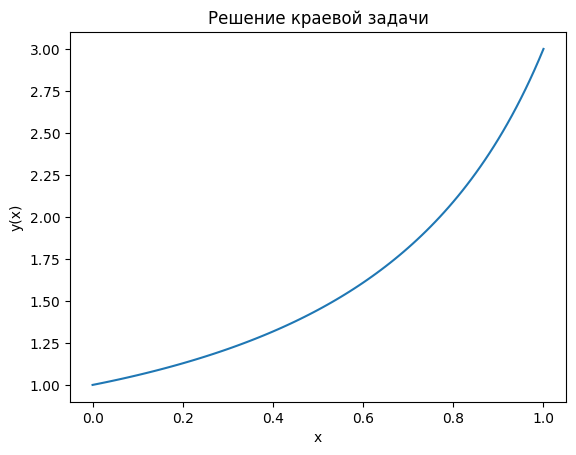

In [23]:
plt.plot(difference_grid_x, result)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Решение краевой задачи')
plt.show()